#### haarcascade 알고리즘 이용해서 얼굴과 눈 영역 추출

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# 알고리즘 등록
face_cascade = cv2.CascadeClassifier("./data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./data/haarcascade_eye.xml")

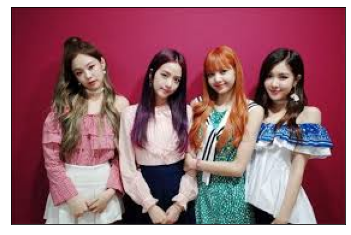

In [3]:
img = cv2.imread("./data/face.jfif")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [10]:
# 얼굴 영역 검출
# scaleFactor : 확대비율만큼 확대해가면서 검색, 작은값일수록 자세히 찾지만 연산량 증가
# minNeighbors : 후보 사각형이 유지해야 하는 최소 이웃의 수, 값이 클수록 덜 감지되고 정확도 증가
# 반환값 : 얼굴들의 좌상단좌표와 가로세로 크기가 튜플 형태로 반환
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=3)

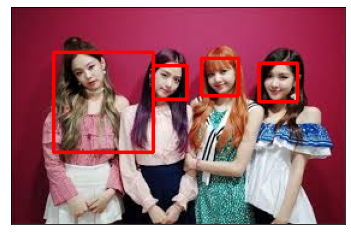

In [16]:
# 검색된 얼굴 영역을 표시
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
    
    # 얼굴 영역 내에서 눈 영역을 검출
    # 얼굴 ROI 자르기
    roi_gray = gray[y:y+h, x:x+w]
    roi_img = img[y:y+h, x:x+w]
    
    # 눈 영역 검출
    eyes = eye_cascade.detectMultiScale(roi_gray,1.1,3)
    
    # 검출된 눈 영역을 표시
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh),(0,255,0),2)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

#### 동영상에서 얼굴과 눈 검출하기

In [6]:
try :
    cap = cv2.VideoCapture("./data/face.mp4")
except:
    print("비디오 캡처 실패")
    
while True:
    ret, frame = cap.read()
    
    if not ret: # 동영상이 프레임을 못 읽었다면
        print("프레임 읽기 실패")
        cap.release()
        cv2.destroyAllWindows()
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    

프레임 읽기 실패
